In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
mean = df['Age'].mean()

In [30]:
df['Age'] = df['Age'].fillna(mean)

In [31]:
survival_rate = df.groupby('Sex')['Survived'].mean()
survival_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [32]:
count = df['Sex'].value_counts()
count

Sex
male      577
female    314
Name: count, dtype: int64

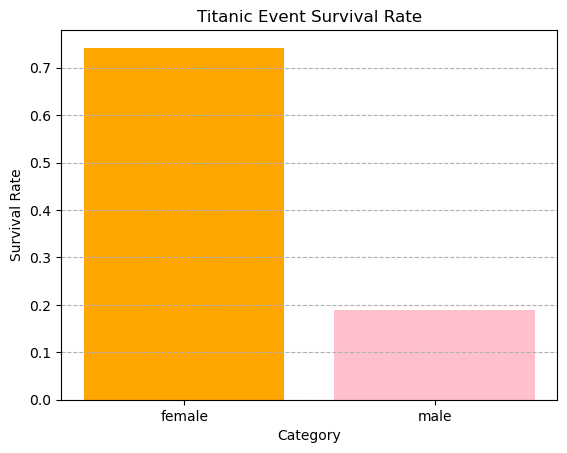

In [33]:
# Bar chart plot; Titanic Event survival rate

plt.bar(survival_rate.index, survival_rate.values)
plt.title("Titanic Event Survival Rate")
plt.xlabel("Category")
plt.ylabel("Survival Rate")
plt.bar(survival_rate.index, survival_rate.values, color='pink')
fig, ax = plt.bar(survival_rate.index, survival_rate.values)
plt.bar(survival_rate.index, survival_rate.values, color=['orange', 'pink'])
plt.grid(axis='y', linestyle='--')

In [34]:
# Survival rate by Passenger class
Pclass_mean = df.groupby('Pclass')['Survived'].mean()
Pclass_mean

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

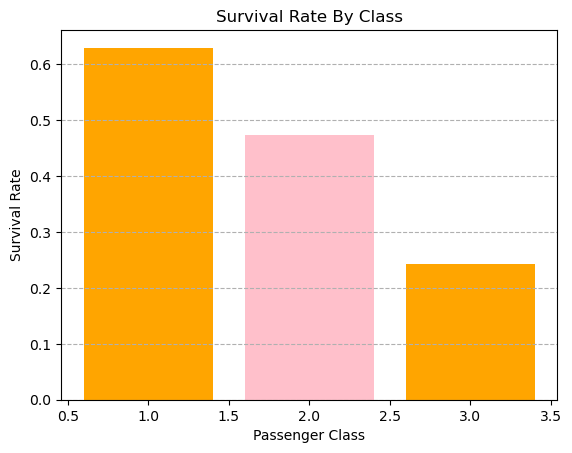

In [35]:
# Bar chart plot; Survival rate by class
plt.bar(Pclass_mean.index, Pclass_mean.values)
plt.title("Survival Rate By Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.savefig("titanic_survival_rate_by_class.png")
plt.bar(Pclass_mean.index, Pclass_mean.values, color=['orange', 'pink'])
plt.grid(axis='y', linestyle='--')

In [14]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 19, 59, 100], labels=['children', 'teenagers', 'adults', 'seniors'])
agegroup_mean = df.groupby('AgeGroup', observed=False)['Survived'].mean()
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 30, 50, 100, 500], labels=['Low', 'Medium', 'High', 'Very High'])
faregroup_mean = df.groupby('FareGroup', observed=False)['Survived'].mean()

agegroup_mean
faregroup_mean

FareGroup
Low          0.319315
Medium       0.364865
High         0.654206
Very High    0.720000
Name: Survived, dtype: float64

In [37]:
# Survival rate by sex and passenger class
try:
    df = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: The file 'train.csv' was not found")
    exit()
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
survival_by_sex_pclass = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
survival_by_sex_pclass

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [38]:
# Handles missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Unstacks the data to prepare it for the grouped bar chart
unstacked_data = survival_by_sex_pclass.unstack()
unstacked_data

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


The grouped bar chart has been saved as 'titanic_survival_by_sex_and_class.png'.


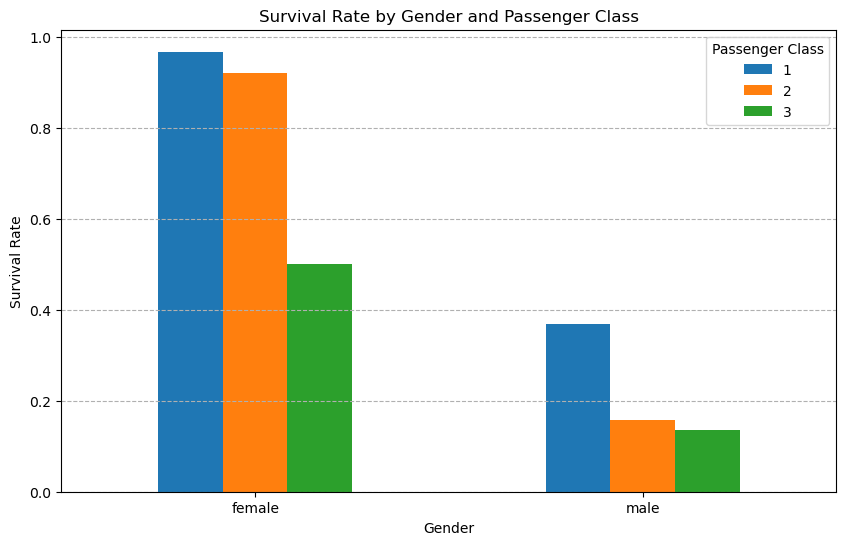

In [39]:

# Handle missing values as we did previously
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Group by both Sex and Pclass and calculate the mean survival rate
survival_by_sex_pclass = df.groupby(['Sex', 'Pclass'])['Survived'].mean()

# Unstack the data to prepare it for a grouped bar chart
unstacked_data = survival_by_sex_pclass.unstack()

# Create the grouped bar chart using the plot() method
unstacked_data.plot(kind='bar', figsize=(10, 6))

# Add labels and a title to make the plot clear
plt.title("Survival Rate by Gender and Passenger Class")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.legend(title='Passenger Class')
plt.grid(axis='y', linestyle='--')

# Save the plot to a file
plt.savefig("titanic_survival_by_sex_and_class.png")

print("The grouped bar chart has been saved as 'titanic_survival_by_sex_and_class.png'.")

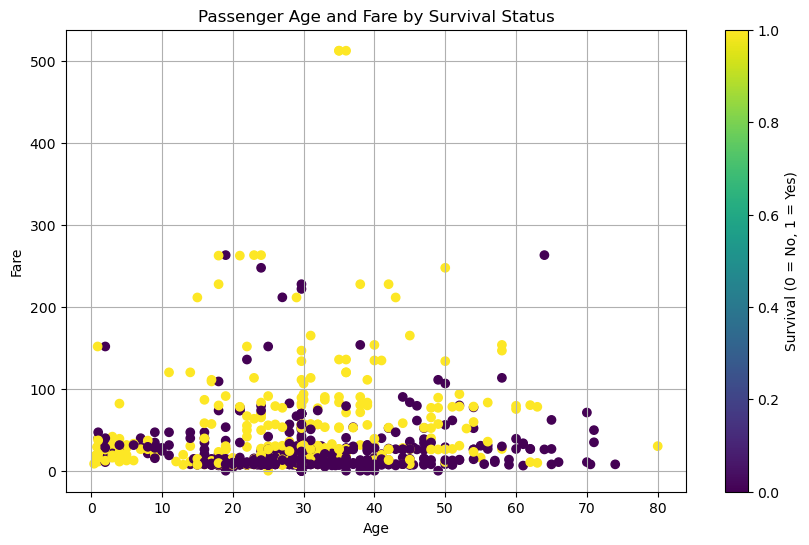

In [40]:
import matplotlib.pyplot as plt

# Plots the canvas to 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))
# Create the scatter plot
plt.scatter(df['Age'], df['Fare'], c=df['Survived'])

# Add labels and a title to make the plot clear
plt.title('Passenger Age and Fare by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survival (0 = No, 1 = Yes)')
plt.grid(True)

# Save the plot to a file
plt.savefig('titanic_age_fare_survival_scatter.png')


In [41]:
# Load the data
try:
    df = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: The file 'train.csv' was not found. Please ensure it is in the same directory.")
    exit()

# Handle missing values as we did previously
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Count the number of survivors and non-survivors
counts = df['Survived'].value_counts()
counts

Survived
0    549
1    342
Name: count, dtype: int64

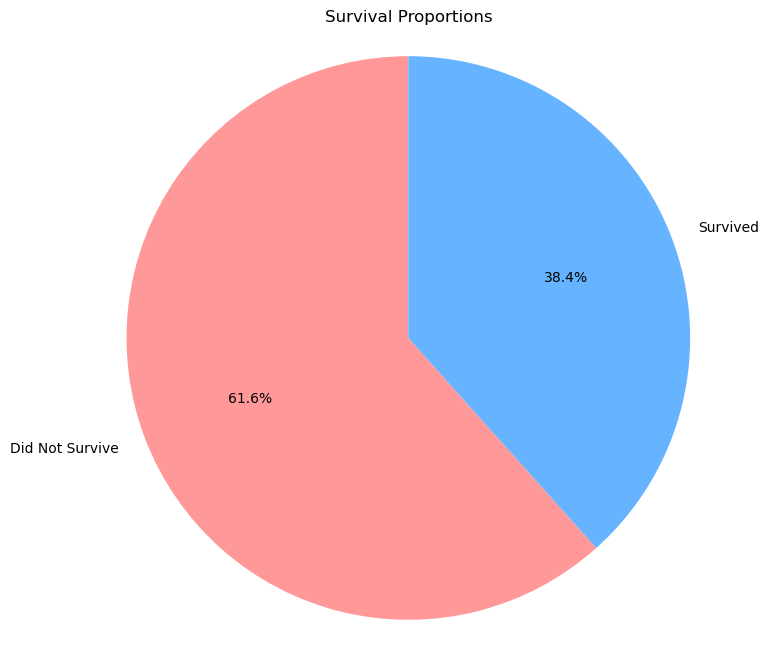

In [42]:
# Load the data
try:
    df = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: The file 'train.csv' was not found. Please ensure it is in the same directory.")
    exit()

# Handle missing values as we did previously
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Count the number of survivors and non-survivors
counts = df['Survived'].value_counts()

# Create the labels for our pie chart
labels = ['Did Not Survive', 'Survived']

# Create the pie chart
plt.figure(figsize=(8, 8))
# Shows the percentage with one decimal place
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])

# Add a title
plt.title('Survival Proportions')

# Ensure the pie chart is a circle
plt.axis('equal')

# Save the plot
plt.savefig('titanic_survival_pie_chart.png')

In [43]:
# Making prediction from the data

# Replace every male and female with 0 and 1 respectively
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop('Embarked', axis=1)

In [44]:
# The features are all the columns prepared
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']]

# Our target variable is the 'Survived' column
y = df['Survived']

# Splits the data into a test set and train set# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
model = LogisticRegression(solver='liblinear')

# Fit the model to our training data
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [49]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7988826815642458

In [9]:

df = df.copy()
# Define the bins and labels for our new feature
bins = [0, 12, 17, 60, 100]
labels = ['children', 'teenagers', 'adults', 'seniors']

# Create the new 'AgeGroup' column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Print the first few rows to confirm the new column was created
df[['Age', 'AgeGroup']].head(20)

,Age,AgeGroup
0,22.000000,adults
1,38.000000,adults
2,26.000000,adults
3,35.000000,adults
4,35.000000,adults
5,29.699118,adults
6,54.000000,adults
7,2.000000,children
8,27.000000,adults
9,14.000000,teenagers


In [11]:
df.copy()
# Get the survival rate by age group
ageGroupMean = df.groupby('AgeGroup', observed=True)['Survived'].mean()
ageGroupMean

/tmp/ipykernel_7955/2670217380.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageGroupMean = df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
children     0.579710
teenagers    0.477273
adults       0.365079
seniors      0.227273
Name: Survived, dtype: float64